# Scripting

In [4]:
# importa as bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import glob

In [92]:
# função para renomear os arquivos de maneira sistemática
def renomear_mes(dir_path) -> None:
    
    
    # dicionário
    meses = {'JAN': '01', 'FEV': '02', 'MAR': '03', 'ABR': '04', 'MAI': '05', 'JUN': '06', 'JUL': '07',
              'AGO': '08', 'SET': '09', 'OUT': '10', 'NOV': '11', 'DEZ': '12'}
    
    files = []
    # intera sobre os arquivos da pasta
    try:
        for file_name in os.listdir(dir_path):
            if file_name.endswith('.csv'):
                # mantém o nome antigo para renomeação depois
                old_file_name = file_name
                # removendo a extensão .csv
                file_name = file_name[:-4]
                # separa o arquivo por seus 'componentes principais'
                file_parts = file_name.split('_')
                # captura a parte do mês
                mes_abrev = file_parts[3]
                # retorna o nome com a numeração dada pelo dicionário
                file_parts[3] = meses[mes_abrev]
                # junta o novo nome e ordenando pelo mês
                new_file_name = '_'.join(file_parts) + '.csv'
                # renomeia os arquivos
                os.rename(os.path.join(dir_path, old_file_name), os.path.join(dir_path, new_file_name))
                files.append(new_file_name)
        
        return files
                
    except KeyError:
        print('Arquivo não encontrado. Checar se já não foi renomeado. \n')
        return None

In [127]:
# função para o plot da pivot_table
def plota_pivot_table(df, value, index, func, y_label, x_label, opcao='nada'):
    
    if opcao == 'nada':
        pd.pivot_table(df, values=value, index=index,aggfunc=func).plot(figsize=[15, 5])
    elif opcao == 'unstack':
        pd.pivot_table(df, values=value, index=index,aggfunc=func).unstack().plot(figsize=[15, 5])
    elif opcao == 'sort':
        pd.pivot_table(df, values=value, index=index,aggfunc=func).sort_values(value).plot(figsize=[15, 5])
    
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    
    return None

Arquivo não encontrado. Checar se já não foi renomeado. 

Qual o nome da pasta dos arquivos de entrada?
> input
Pasta de Destino: input
1. SINASC_RO_2019_01.csv
2. SINASC_RO_2019_02.csv
3. SINASC_RO_2019_03.csv
4. SINASC_RO_2019_04.csv
5. SINASC_RO_2019_05.csv
6. SINASC_RO_2019_06.csv
7. SINASC_RO_2019_07.csv
8. SINASC_RO_2019_08.csv
9. SINASC_RO_2019_09.csv
10. SINASC_RO_2019_10.csv
11. SINASC_RO_2019_11.csv
12. SINASC_RO_2019_12.csv
Digite o número do(s) arquivo(s) a serem carregados, separados por vírgula: Aperte ENTER para concluir.
> 1,3
Arquivo: SINASC_RO_2019_01.csv
Período: (2019-01-01 - 2019-01-31) 

Pasta de destino das imagens: ../output/figuras/2019-01-31.
Arquivo: SINASC_RO_2019_02.csv
Período: (2019-01-01 - 2019-03-31) 

Pasta de destino das imagens: ../output/figuras/2019-03-31.


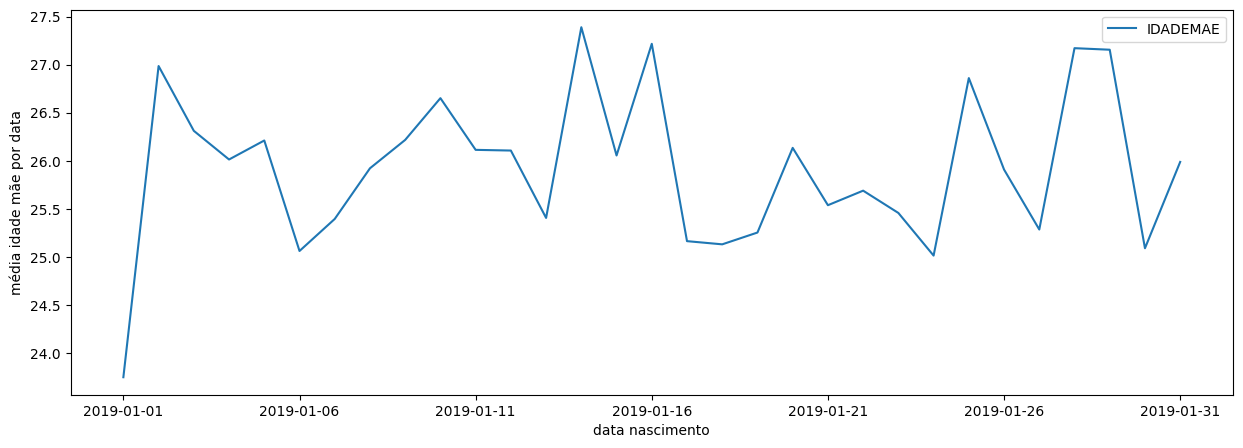

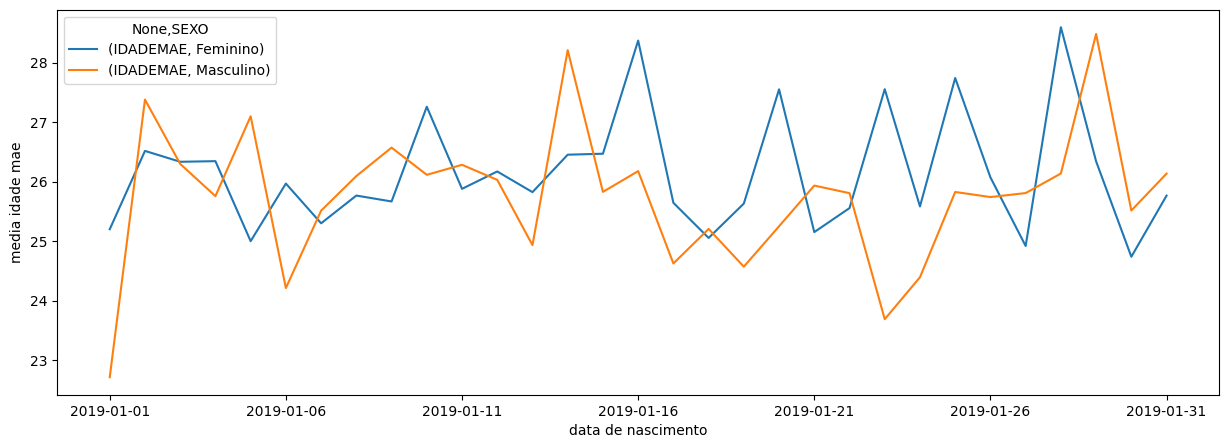

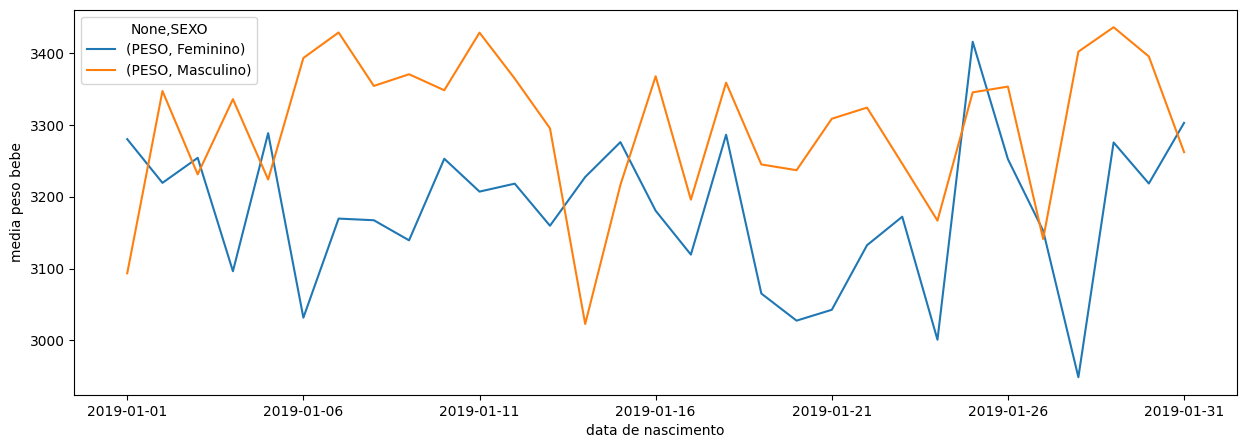

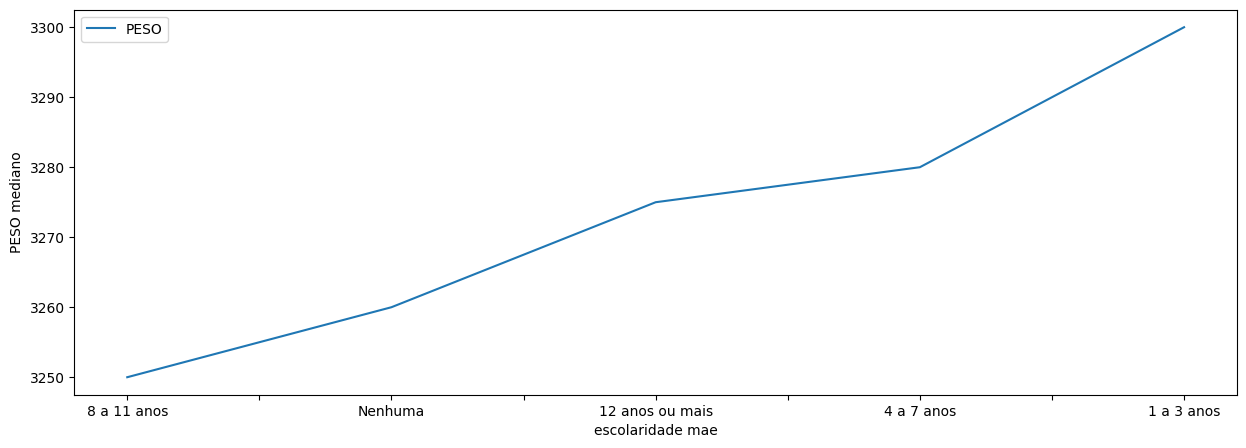

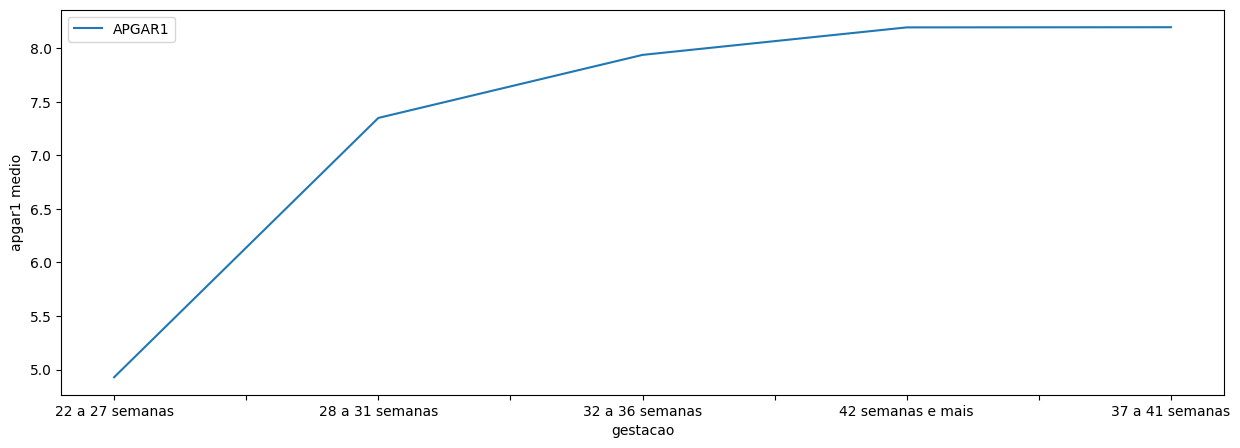

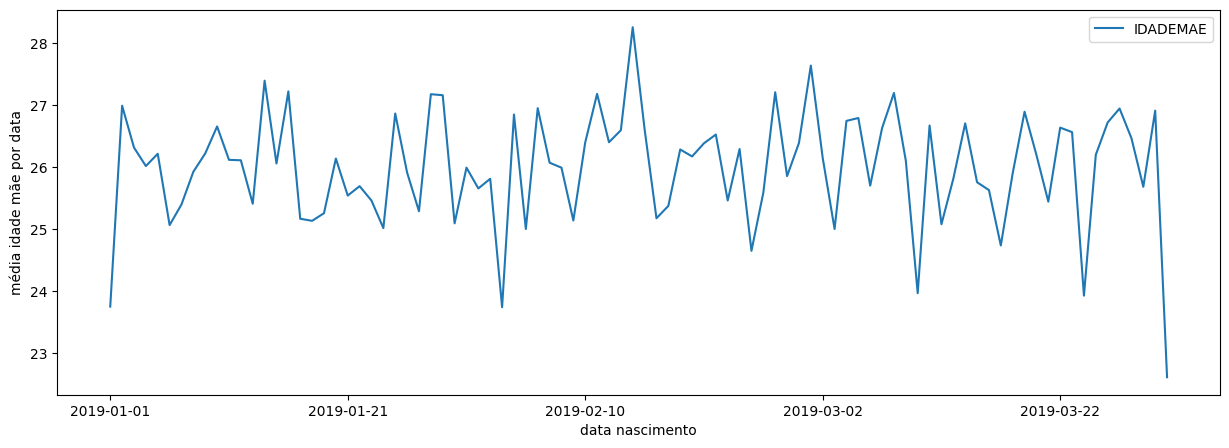

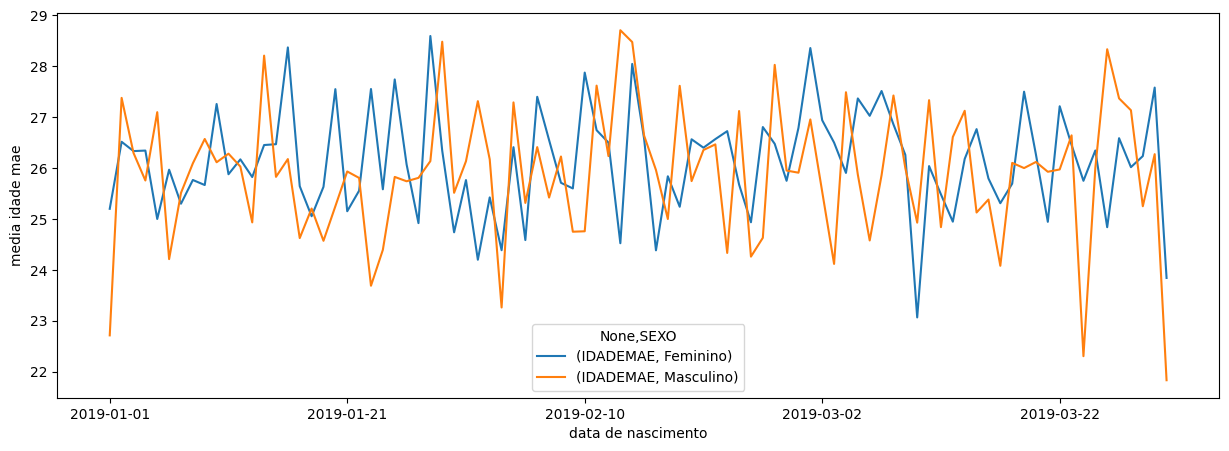

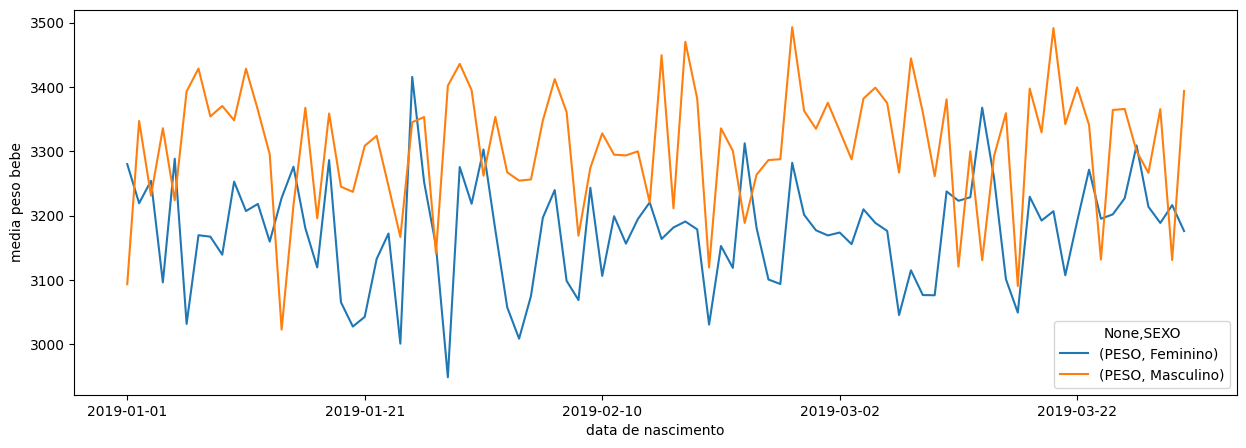

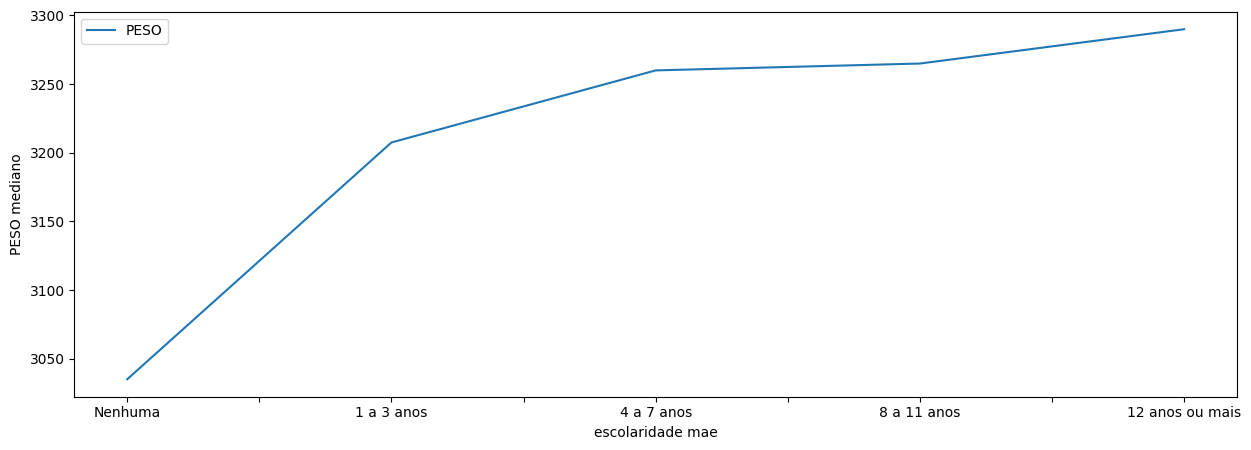

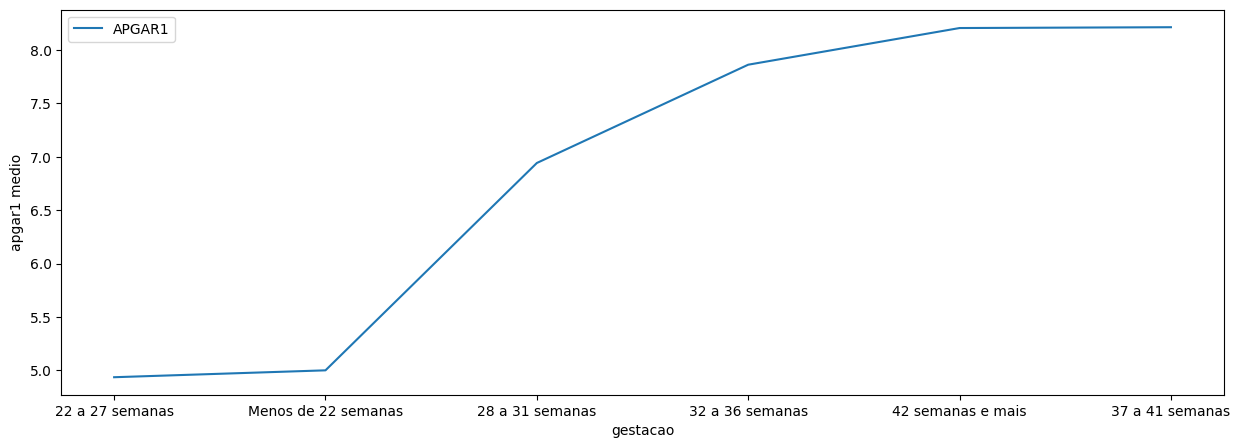

In [130]:

# renomeia os arquivos presentes na pasta de destino input
renomear_mes(input_dir)

# nome da pasta input
input_dir = input('Qual o nome da pasta dos arquivos de entrada?\n> ')
print(f'Pasta de Origem: {input_dir}')

# mudança até a pasta input
os.chdir(input_dir)

# captura o nome dos novos arquivos
csv_files = sorted(glob.glob('*.csv'))
for index, file_name in enumerate(csv_files):
    print(f'{index+1}. {file_name}')

# o usuário seleciona os arquivos a serem carregados
print('Digite o número do(s) arquivo(s) a serem carregados, separados por vírgula: Aperte ENTER para concluir.')
selected_files = input('> ').split(',')
selected_indices = [int(index) - 1 for index in selected_files]

# limpa a tela
os.system('cls' if os.name == 'nt' else 'clear')

# carrega o .csv em um dataframe
dfs = [pd.read_csv(csv_files[i]) for i in selected_indices]
for df,csv in zip(dfs,csv_files):
    print(f"Arquivo: {csv}")
    print(f"Período: ({df['DTNASC'].min()} - {df['DTNASC'].max()}) \n")

    # salva a data máxima do dataset no formato string
    data_maxima = str(df['DTNASC'].max())
    # cria uma pasta output para as figuras
    os.makedirs('../output/figuras/'+data_maxima, exist_ok=True)
    output_dir = ('../output/figuras/'+data_maxima)
    print(f'Pasta de destino das imagens: {output_dir}.')
    
    # plota as imagens
    plota_pivot_table(df, 'IDADEMAE', 'DTNASC', 'mean', 'média idade mãe por data', 'data nascimento')
    plt.savefig(os.path.join(output_dir, 'media idade mae por data.png'))

    plota_pivot_table(df, 'IDADEMAE', ['DTNASC', 'SEXO'], 'mean', 'media idade mae','data de nascimento','unstack')
    plt.savefig(os.path.join(output_dir, 'media idade mae por sexo.png'))

    plota_pivot_table(df, 'PESO', ['DTNASC', 'SEXO'], 'mean', 'media peso bebe','data de nascimento','unstack')
    plt.savefig(os.path.join(output_dir, 'media peso bebe por sexo.png'))

    plota_pivot_table(df, 'PESO', 'ESCMAE', 'median', 'PESO mediano','escolaridade mae','sort')
    plt.savefig(os.path.join(output_dir, 'PESO mediano por escolaridade mae.png'))

    plota_pivot_table(df, 'APGAR1', 'GESTACAO', 'mean', 'apgar1 medio','gestacao','sort')
    plt.savefig(os.path.join(output_dir, 'media apgar1 por gestacao.png'))


# volta a pasta original
os.chdir('..')

A automação desses arquivos passa por uma padronização do nome dos arquivos. Com isso, fica mais fácil a identificação dos padrões e da generalização das funções. Como feito acima para o mês, é possível fazer para o ano também.